In [1]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
from torch import optim
import matplotlib.pyplot as plt
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

transformer = transforms.Compose(
    [transforms.Resize((64,64)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data',train = True,download=True,transform=transformer)
testset = torchvision.datasets.CIFAR10(root='./data',train = False,download=True,transform=transformer)

train_loader = DataLoader(trainset,batch_size=25,shuffle=True,num_workers=2)
test_loader = DataLoader(testset,batch_size=25,shuffle=True,num_workers=2)


classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

cuda


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



In [2]:
class ConvNet(nn.Module):
      def __init__(self):
        """CNN Builder."""
        super(ConvNet, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096*4, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


      def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [5]:
net=ConvNet().to(device)
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
optimizer.zero_grad()
print(list(net.parameters())[0].size())
criterion = nn.CrossEntropyLoss()
print(len(train_loader))
print(len(test_loader))


torch.Size([32, 3, 3, 3])
2000
400


In [6]:
for epoch in range(30):

  running_loss = 0.0
  for i,(images,labels) in enumerate(train_loader):

    if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

    optimizer.zero_grad()

    outputs = net(images)
    loss = criterion(outputs,labels)
    running_loss += loss
    loss.backward()
    optimizer.step()

  print(running_loss/len(train_loader))



tensor(1.4490, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.9525, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.7392, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6025, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4879, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3839, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2882, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2038, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1388, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0858, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<DivBack

In [7]:
    
test_accuracy=0.0
for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        outputs=net(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
        if i%999 == 0:
          print(labels.data,prediction)
    

test_accuracy=100*test_accuracy/(25*len(test_loader))
    
print(test_accuracy)

tensor([2, 2, 6, 2, 5, 5, 3, 1, 6, 3, 3, 8, 0, 5, 3, 8, 5, 0, 7, 4, 1, 9, 8, 4,
        8], device='cuda:0') tensor([2, 2, 2, 5, 0, 3, 3, 1, 6, 5, 3, 8, 0, 3, 3, 8, 5, 0, 7, 4, 1, 9, 8, 6,
        8], device='cuda:0')
82.97


ground truth :        frog     truck      bird     plane      bird      frog       dog      frog       dog       car     plane      ship      ship       car      deer     plane     horse     plane      frog       car       dog      ship      ship       car       dog
predicted :        deer     truck      bird     plane      bird      frog       dog      frog     plane       car      bird      ship      ship       car      deer     plane     horse     plane      frog       car       dog      ship     plane       car       cat


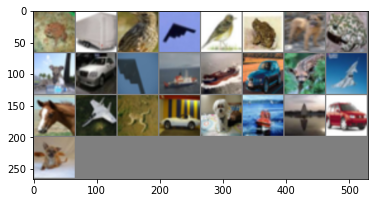

In [8]:
def imageshow(img):
  img= img /2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images 
imageshow(torchvision.utils.make_grid(images))

print ("ground truth : " ,''.join('%10s'% classes[labels[j]] for j in range(25)))

if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
outputs=net(images)

_,predicted = torch.max(outputs.data,1)

print ("predicted : " ,''.join('%10s'% classes[predicted[j]] for j in range(25)))